# Packages importation

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from statistics import mean
import pandas
import pandas as pd
import numpy
import numpy as np

# Functions definition

In [29]:
def sorted_dict(d):
    return sorted(d.items(), key=lambda t: t[1], reverse=True)

We did 6 different analyzes:
- 1) On our complete database (films + series)
- 2) Only on the film database
- 3) Only on the series database
- 4) On our database (films + series) with suppression of the 3 most frequent genres (Comedies, Dramas and Documentary films)
- 5) Only on the database of films with suppression of the 3 most frequent genres
- 6) On only the series database with suppression of the 3 most frequent genres

# Data importation

## 1) With all the data (we keep here the 3 most frequent genres in all our historical)

- Titles

In [30]:
dico_title = {}

with open("../Data/With3MostCommons/Titles.txt","r", encoding = "utf-8") as f:
    for line in f.readlines():
        content = line.replace('\n','').split('\t')
        dico_title[content[0]] = content[1]
        
#dico_title

- Nodes weight

In [31]:
dico_node = {}

with open("../Data/With3MostCommons/Nodes_weight.txt","r", encoding = "utf-8") as f:
    for line in f.readlines():
        content = line.replace('\n','').split('\t')
        dico_node[content[0]] = float(content[1])
        
# dico_node

- Links

In [32]:
dico_link = {}

with open("../Data/With3MostCommons/Liaisons.txt","r", encoding = "utf-8") as f:
    for line in f.readlines():
        content = line.replace('\n','').split('\t')
        dico_link[f"{content[0]}\t{content[1]}"] = int(content[2])
        
# dico_link

## Graph creation

In [33]:
G = nx.Graph()
for key, value in dico_node.items():
    G.add_node(key,weight=value)

In [34]:
for key, value in dico_link.items():
    ID = key.split('\t')
    G.add_edge(ID[0], ID[1], weight=value)

C:\Users\Valentine\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


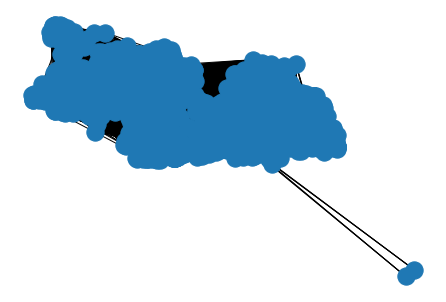

In [35]:
nx.draw(G,pos=nx.spring_layout(G))

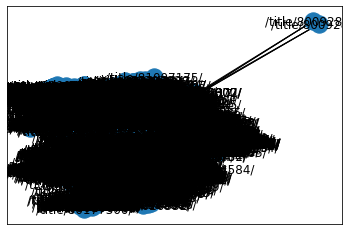

In [36]:
plt.figure()
nx.draw_networkx(G)
plt.show()

## Definition of the graph

We display in this function 'definition_graph' : 
- The number of nodes:
- The minimum/maximum/mean degree
- The density of graph

In [37]:
def definition_graph(graph):
    def_graph = pandas.DataFrame(numpy.array([ [ graph.number_of_nodes(), graph.number_of_edges(), min(dict(nx.degree(graph)).values()), max(dict(nx.degree(graph)).values()), 
                                            round( mean(dict(nx.degree(graph)).values()),2),  round(nx.density(graph), 2) ] ]), 
                      columns = ['number_nodes', 'number_edge', 'degree min', 'degree max', 'degree mean', 'density graph'])
    return def_graph
    
definition_graph(G)

,number_nodes,number_edge,degree min,degree max,degree mean,density graph
0,3996.0,1383195.0,4.0,1714.0,692.29,0.17


We display in this function 'display_titles_movies_degree' : 
- The movies which are the maximum degree
- The movies which are the minimum degree 

In [38]:
def display_titles_movies_degree(graph):
    indexs_min = []
    indexs_max = []
    for key, value in dict(nx.degree(graph)).items() :
        if value ==  min(dict(nx.degree(graph)).values()) :
            indexs_min.append( dico_title[key] )
        if value == max(dict(nx.degree(graph)).values()) :
            indexs_max.append( dico_title[key] )
    
    title_degree_movies = pandas.DataFrame(numpy.array([ indexs_min[0], indexs_max[0]  ]), 
                      index = ['degree min', 'degree max'], columns = ['movie'])
    return title_degree_movies
    
display_titles_movies_degree(G)

,movie
degree min,Une cheminée à la maison : Version Bois de bou...
degree max,The Dirt


## Centrality

Degree centrality measures popularity (the number of neighbors a node has).

Compute the **degree centrality** for nodes :

In [39]:
def degree_centrality(graph) :
    degree_centrality = sorted_dict(nx.degree_centrality(graph))[:10]  # centralité de proximité
    title = [dico_title[elem[0]] for elem in degree_centrality]
    index = [elem[1] for elem in degree_centrality]

    tab_degree_centrality = pd.DataFrame(np.transpose(np.array([title,index])),columns = ["title", "degree centrality"])
    return tab_degree_centrality

degree_centrality(G)

,title,degree centrality
0,The Dirt,0.4290362953692115
1,Saint-Jacques... La Mecque,0.4210262828535669
2,My Deer Hunter Dad,0.4157697121401752
3,El Alien y Yo,0.4135168961201502
4,Dave Chappelle: Equanimity & The Bird Revelation,0.4127659574468085
5,La Guerre selon Charlie Wilson,0.4117647058823529
6,Julie & Julia,0.4112640801001251
7,Docteur Patch,0.4110137672090112
8,Colkatay Columbus,0.40826032540675844
9,Dave Chappelle,0.3997496871088861


Closeness centrality measures proximity (the length of their shortest path).

Compute **closeness centrality** (in french 'centralité de proximité') for nodes :

In [40]:
def closeness_centrality(graph) :
    closeness_centrality = sorted_dict(nx.closeness_centrality(graph))[:10]  # centralité de proximité
    title = [dico_title[elem[0]] for elem in closeness_centrality]
    index = [elem[1] for elem in closeness_centrality]

    tab_closeness_centrality = pd.DataFrame(np.transpose(np.array([title,index])),columns = ["title", "closeness centrality"])
    return tab_closeness_centrality

closeness_centrality(G)

,title,closeness centrality
0,The Dirt,0.6320202499604493
1,Dave Chappelle: Equanimity & The Bird Revelation,0.6300268096514745
2,El Alien y Yo,0.6258812470625098
3,Dave Chappelle,0.6249022368215236
4,Kabhi Haan Kabhi Naa,0.6182296502630764
5,Holy Camp!,0.6164172195648819
6,The Clapper,0.6136712749615976
7,Shakespeare in Love,0.6127300613496932
8,Alex Strangelove,0.611791730474732
9,The Laundromat : L'affaire des Panama Papers,0.6106695200244574


Betweenness centrality measures the ease of connection (corresponds to the number of times a node is a crossing point on the shortest path between two other nodes).

Compute the shortest-path **betweenness centrality** (in french 'centralité d'intermédiarité') for nodes :

In [41]:
def betweenness_centrality(graph) :
    betweenness_centrality = sorted_dict(nx.betweenness_centrality(graph))[:10]  # centralité intermédiaire
    title = [dico_title[elem[0]] for elem in betweenness_centrality]
    index = [elem[1] for elem in betweenness_centrality]

    betweenness_centrality = pd.DataFrame(np.transpose(np.array([title,index])),columns = ["title", "betweenness centrality"])
    return betweenness_centrality

betweenness_centrality(G)

,title,betweenness centrality
0,Dave Chappelle: Equanimity & The Bird Revelation,0.026157159918781033
1,Dave Chappelle,0.02196147470146899
2,James Acaster: Repertoire,0.019186778746769377
3,Jenny Slate: Stage Fright,0.009951570016259736
4,Black Mirror: Bandersnatch,0.006406353760270023
5,Sur le gril : Quand se nourrir est un défi,0.004640184360373949
6,Notes on Blindness,0.004430841656475235
7,Capitaine Superslip et le conte terrifiant du ...,0.004006386640633281
8,Lost & Found : Le studio,0.003971545985069681
9,La véritable Miyagi,0.003942845113996617


Eigenvector centrality measures the influence of the node in the network.

Compute the **eigenvector centrality** for the graph G :

In [13]:
def eigenvector_centrality(graph) :
    eigen = sorted_dict(nx.eigenvector_centrality(graph))[:10] # Centralité de vecteur propre
    title = [dico_title[elem[0]] for elem in eigen]
    index = [elem[1] for elem in eigen]

    tab_eigenvector_centrality = pd.DataFrame(np.transpose(np.array([title,index])),columns = ["title", "eigen vector centrality"])
    return tab_eigenvector_centrality

eigenvector_centrality(G)

,title,eigen vector centrality
0,Saint-Jacques... La Mecque,0.03631153761617287
1,My Deer Hunter Dad,0.03613677014994721
2,The Dirt,0.03602386763667886
3,The Clapper,0.03600237511064578
4,Colkatay Columbus,0.03590479985732871
5,La Guerre selon Charlie Wilson,0.03587123023442041
6,Julie & Julia,0.0358440825456381
7,Docteur Patch,0.03584245144722309
8,2 States,0.035842391964049106
9,The Zoya Factor,0.035842391964049106


# 2) For Movies (we keep here the 3 most frequent genres in all our history)

- Titles

In [15]:
dico_title = {}

with open("../Data/With3MostCommons/Titles_film.txt","r", encoding = "utf-8") as f:
    for line in f.readlines():
        content = line.replace('\n','').split('\t')
        dico_title[content[0]] = content[1]
        
# dico_title

- Nodes weight

In [16]:
dico_node = {}

with open("../Data/With3MostCommons/Nodes_weight_film.txt","r", encoding = "utf-8") as f:
    for line in f.readlines():
        content = line.replace('\n','').split('\t')
        dico_node[content[0]] = float(content[1])
        
# dico_node

- Links

In [17]:
dico_link = {}

with open("../Data/With3MostCommons/Liaisons_film.txt","r", encoding = "utf-8") as f:
    for line in f.readlines():
        content = line.replace('\n','').split('\t')
        dico_link[f"{content[0]}\t{content[1]}"] = int(content[2])
        
# dico_link

## Graph creation (containing only films)

In [18]:
G = nx.Graph()
for key, value in dico_node.items():
    G.add_node(key,weight=value)

In [19]:
for key, value in dico_link.items():
    ID = key.split('\t')
    G.add_edge(ID[0], ID[1], weight=value)

C:\Users\Valentine\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


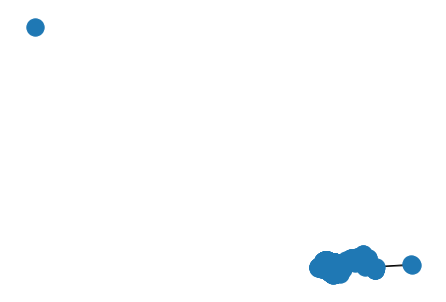

In [9]:
nx.draw(G,pos=nx.spring_layout(G))

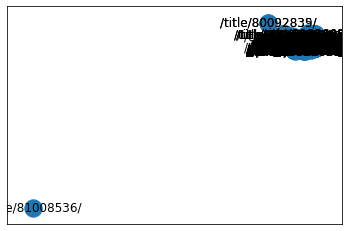

In [10]:
plt.figure()
nx.draw_networkx(G)
plt.show()

## Definition of the graph containing only films

In [20]:
definition_graph(G)

,number_nodes,number_edge,degree min,degree max,degree mean,density graph
0,2533.0,952705.0,0.0,1680.0,752.23,0.3


In [21]:
display_titles_movies_degree(G)

,movie
degree min,Aggretsuko : Joyeux Noël et bon metal !
degree max,The Dirt


## Centrality for data movies

Compute the **degree centrality** for nodes :

In [22]:
degree_centrality(G)

,title,degree centrality
0,The Dirt,0.6635071090047393
1,Saint-Jacques... La Mecque,0.6619273301737757
2,My Deer Hunter Dad,0.6536334913112164
3,La Guerre selon Charlie Wilson,0.6473143759873617
4,Docteur Patch,0.646129541864139
5,Julie & Julia,0.646129541864139
6,Colkatay Columbus,0.641785150078989
7,El Alien y Yo,0.6390205371248026
8,PK,0.6267772511848341
9,Le chocolat,0.6255924170616114


Compute **closeness centrality** for nodes :

In [24]:
closeness_centrality(G)

,title,closeness centrality
0,The Dirt,0.7441177632190317
1,Saint-Jacques... La Mecque,0.7428069274646822
2,My Deer Hunter Dad,0.738255148802074
3,La Guerre selon Charlie Wilson,0.7352514951888136
4,Docteur Patch,0.7346110322139104
5,Julie & Julia,0.7346110322139104
6,Colkatay Columbus,0.7322721837756028
7,El Alien y Yo,0.7307915641088122
8,Le chocolat,0.7247208235304232
9,PK,0.7243058674333546


Compute the shortest-path **betweenness centrality** for nodes :

In [23]:
betweenness_centrality(G)

,title,betweenness centrality
0,Jenny Slate: Stage Fright,0.02557075576777198
1,Notes on Blindness,0.009608910310281592
2,Mountain,0.006928401074107315
3,The Devil and Father Amorth,0.006917661395787156
4,Tig,0.006020401211200151
5,La véritable Miyagi,0.004351767790579086
6,Iron Fists and Kung-Fu Kicks,0.004154159056193851
7,Derren Brown: The Great Art Robbery,0.0034228504060295896
8,El bar,0.0031967252646909845
9,I Dream Of Dance,0.002828409069343392


Compute the **eigenvector centrality** for the graph G :

In [24]:
eigenvector_centrality(G)

,title,eigen vector centrality
0,Saint-Jacques... La Mecque,0.03643069392207273
1,My Deer Hunter Dad,0.036254072968903636
2,The Clapper,0.03610966411290318
3,The Dirt,0.036066697734199016
4,Colkatay Columbus,0.03601879179041306
5,La Guerre selon Charlie Wilson,0.03596958983646115
6,The Zoya Factor,0.03595616615430564
7,2 States,0.035956166154305635
8,Julie & Julia,0.03594139213850667
9,The Fundamentals of Caring,0.035941197201366966


# 3) For series (we keep here the 3 most frequent genres in all our history)

- Titles

In [44]:
dico_title = {}

with open("../Data/With3MostCommons/Titles_serie.txt","r", encoding = "utf-8") as f:
    for line in f.readlines():
        content = line.replace('\n','').split('\t')
        dico_title[content[0]] = content[1]
        
# dico_title

- Nodes weight

In [45]:
dico_node = {}

with open("../Data/With3MostCommons/Nodes_weight_serie.txt","r", encoding = "utf-8") as f:
    for line in f.readlines():
        content = line.replace('\n','').split('\t')
        dico_node[content[0]] = float(content[1])
        
# dico_node

- Links

In [46]:
dico_link = {}

with open("../Data/With3MostCommons/Liaisons_serie.txt","r", encoding = "utf-8") as f:
    for line in f.readlines():
        content = line.replace('\n','').split('\t')
        dico_link[f"{content[0]}\t{content[1]}"] = int(content[2])
        
# dico_link

## Graph creation (containing only serie)

In [47]:
G = nx.Graph()
for key, value in dico_node.items():
    G.add_node(key,weight=value)

In [48]:
for key, value in dico_link.items():
    ID = key.split('\t')
    G.add_edge(ID[0], ID[1], weight=value)

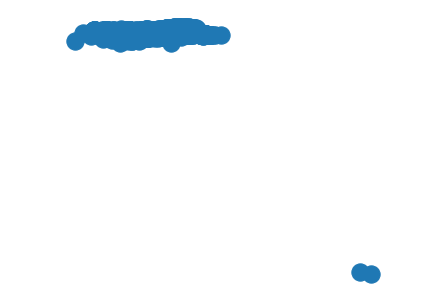

In [34]:
nx.draw(G,pos=nx.spring_layout(G))

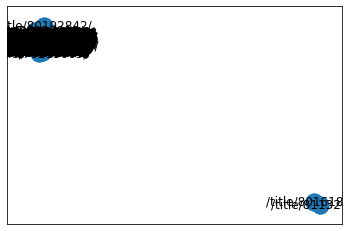

In [35]:
plt.figure()
nx.draw_networkx(G)
plt.show()

## Definition of the graph containing only series

In [49]:
definition_graph(G)

,number_nodes,number_edge,degree min,degree max,degree mean,density graph
0,1463.0,358647.0,1.0,889.0,490.29,0.34


In [50]:
display_titles_movies_degree(G)

,movie
degree min,Pioneers of African-American Cinema
degree max,Girlboss


## Centrality for data movies

Compute the **degree centrality** for nodes :

In [51]:
degree_centrality(G)

,title,degree centrality
0,Girlboss,0.6080711354309165
1,Special,0.6080711354309165
2,Haters Back Off,0.6039671682626538
3,Le cœur a ses raisons,0.6039671682626538
4,The Politician,0.6039671682626538
5,Neo Yokio,0.5991792065663475
6,13 Reasons Why,0.5978112175102599
7,IZombie,0.5930232558139534
8,Gossip Girl,0.591655266757866
9,Trinkets,0.591655266757866


Compute **closeness centrality** for nodes :

In [33]:
%%time
closeness_centrality(G)

Wall time: 5min 36s


,title,closeness centrality
0,Girlboss,0.7178743160896662
1,Special,0.7178743160896662
2,Haters Back Off,0.7157598114767364
3,Le cœur a ses raisons,0.7157598114767364
4,The Politician,0.7157598114767364
5,Neo Yokio,0.7133085792456517
6,13 Reasons Why,0.7126113079071907
7,IZombie,0.7101815567355636
8,Gossip Girl,0.7094903824711009
9,Trinkets,0.7094903824711009


Compute the shortest-path **betweenness centrality** for nodes :

In [34]:
%%time 
betweenness_centrality(G)

Wall time: 3min 43s


,title,betweenness centrality
0,Si J'étais un Animal,0.010360330570365867
1,Les anonymes,0.005281559389745132
2,You vs. Wild,0.0043238405912451455
3,Sur le gril : Quand se nourrir est un défi,0.003972997270658929
4,Zoe et Raven,0.0035800512475352092
5,ARASHI's Diary -Voyage-,0.0034330161315022784
6,Castlevania,0.0031994581297516184
7,Mob Psycho 100,0.003169185411328979
8,Le Club de la deuxième chance,0.003140463611782473
9,Seis Manos,0.003118314737448846


Compute the **eigenvector centrality** for the graph G :

In [49]:
eigenvector_centrality(G)

,title,eigen vector centrality
0,Special,0.04774142728233362
1,Girlboss,0.047741427282333604
2,The Politician,0.047303437969420443
3,Haters Back Off,0.047187829152036016
4,Neo Yokio,0.04717680594157334
5,IZombie,0.04650038396152051
6,American Vandal,0.046350648875842254
7,Atypical,0.046350648875842254
8,Everything Sucks!,0.046350648875842254
9,Insatiable,0.046350648875842254


# 4) Without the 3 most frequent genres in all our historical

- Titles

In [13]:
dico_title = {}

with open("../Data/Without3MostCommons/Titles.txt","r", encoding = "utf-8") as f:
    for line in f.readlines():
        content = line.replace('\n','').split('\t')
        dico_title[content[0]] = content[1]
        
# dico_title

- Nodes weight

In [14]:
dico_node = {}

with open("../Data/Without3MostCommons/Nodes_weight.txt","r", encoding = "utf-8") as f:
    for line in f.readlines():
        content = line.replace('\n','').split('\t')
        dico_node[content[0]] = float(content[1])
        
# dico_node

- Links

In [15]:
dico_link = {}

with open("../Data/Without3MostCommons/Liaisons.txt","r", encoding = "utf-8") as f:
    for line in f.readlines():
        content = line.replace('\n','').split('\t')
        dico_link[f"{content[0]}\t{content[1]}"] = int(content[2])
        
# dico_link

## Graph creation (containing movies + series)

In [16]:
G = nx.Graph()
for key, value in dico_node.items():
    G.add_node(key,weight=value)

In [17]:
for key, value in dico_link.items():
    ID = key.split('\t')
    G.add_edge(ID[0], ID[1], weight=value)

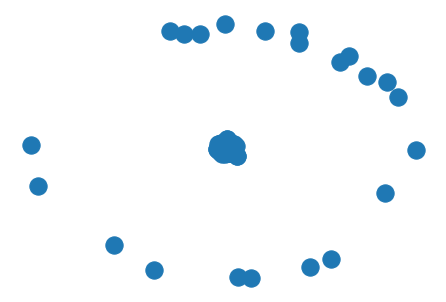

In [47]:
nx.draw(G,pos=nx.spring_layout(G))

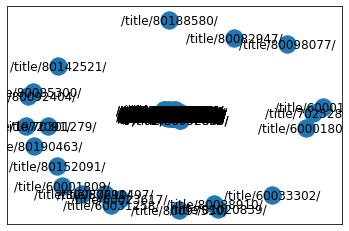

In [48]:
plt.figure()
nx.draw_networkx(G)
plt.show()

## Definition of the graph containing movies + series

In [57]:
definition_graph(G)

,number_nodes,number_edge,degree min,degree max,degree mean,density graph
0,3996.0,829014.0,0.0,1100.0,414.92,0.1


In [58]:
display_titles_movies_degree(G)

,movie
degree min,Action Point
degree max,Bleu Saphir


## Centrality for data movies

Compute the **degree centrality** for nodes :

In [59]:
degree_centrality(G)

,title,degree centrality
0,Bleu Saphir,0.27534418022528157
1,Rouge rubis,0.27534418022528157
2,Tiffany Haddish Presents: They Ready,0.2658322903629537
3,Irish Gangster,0.2618272841051314
4,HUMORISTES du monde,0.25957446808510637
5,Historical Roasts,0.2585732165206508
6,Bumping Mics with Jeff Ross & Dave Attell,0.2575719649561952
7,Daniel Sloss: Live Shows,0.2575719649561952
8,Ellen DeGeneres: Relatable,0.2575719649561952
9,Stand Up and Away! with Brian Regan,0.2575719649561952


Compute **closeness centrality** for nodes :

In [18]:
%%time
closeness_centrality(G)

Wall time: 38min 40s


,title,closeness centrality
0,Bleu Saphir,0.5634799132115372
1,Rouge rubis,0.5634799132115372
2,Irish Gangster,0.5589363631969584
3,Les Misérables,0.5586992578392673
4,Glee,0.5527589747396893
5,Avril et le Monde truqué,0.5507556664955812
6,Le cœur a ses raisons,0.5494536436433457
7,Crazy Ex-Girlfriend,0.5489955747449353
8,Neo Yokio,0.548919304173284
9,Chair de Poule - le film,0.5478537370270796


Compute the shortest-path **betweenness centrality** for nodes :

In [19]:
%%time
betweenness_centrality(G)

Wall time: 24min 29s


,title,betweenness centrality
0,Black Mirror: Bandersnatch,0.008468370983950877
1,The Creative Brain,0.005260341953212939
2,Tig,0.00525269445643461
3,Poursuis tes rêves,0.005156712539119102
4,Müslüm,0.005113684419084162
5,La véritable Miyagi,0.005029508553221354
6,Sur le gril : Quand se nourrir est un défi,0.004739450501657141
7,Russell Peters vs. the World,0.0046092635018642825
8,Lost & Found : Le studio,0.004544813653110298
9,Naruto the Last : Le film,0.004535741959527441


Compute the **eigenvector centrality** for the graph G :

In [58]:
eigenvector_centrality(G)

,title,eigen vector centrality
0,Girlboss,0.04637151897687547
1,Special,0.04637151897687547
2,The Politician,0.04596808711833725
3,Haters Back Off,0.04591783813949129
4,Neo Yokio,0.04587184513296487
5,Tiffany Haddish Presents: They Ready,0.04560424233793661
6,Les curieuses créations de Christine McConnell,0.045263817113500665
7,IZombie,0.0452612816805138
8,Petits coups de pouce avec Carol Burnett,0.0451038562820157
9,Un Noël chez Mamilia,0.04509976982922144


# 5) For Movies (without the 3 most frequent genres in all our history)

- Titles

In [14]:
dico_title = {}

with open("../Data/Without3MostCommons/Titles_film.txt","r", encoding = "utf-8") as f:
    for line in f.readlines():
        content = line.replace('\n','').split('\t')
        dico_title[content[0]] = content[1]
        
# dico_title

- Nodes weight

In [15]:
dico_node = {}

with open("../Data/Without3MostCommons/Nodes_weight_film.txt","r", encoding = "utf-8") as f:
    for line in f.readlines():
        content = line.replace('\n','').split('\t')
        dico_node[content[0]] = float(content[1])
        
# dico_node

- Links

In [16]:
dico_link = {}

with open("../Data/Without3MostCommons/Liaisons_film.txt","r", encoding = "utf-8") as f:
    for line in f.readlines():
        content = line.replace('\n','').split('\t')
        dico_link[f"{content[0]}\t{content[1]}"] = int(content[2])
        
# dico_link

## Graph creation (containing only films)

In [17]:
G = nx.Graph()
for key, value in dico_node.items():
    G.add_node(key,weight=value)

In [18]:
for key, value in dico_link.items():
    ID = key.split('\t')
    G.add_edge(ID[0], ID[1], weight=value)

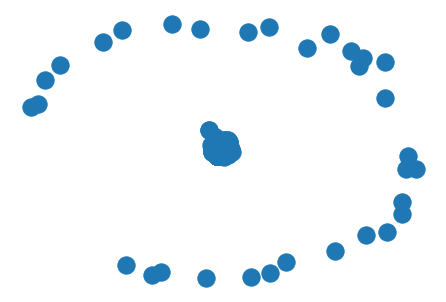

In [61]:
nx.draw(G,pos=nx.spring_layout(G))

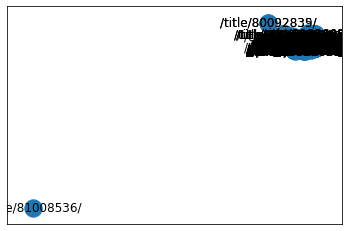

In [10]:
plt.figure()
nx.draw_networkx(G)
plt.show()

## Definition of the graph containing only films

In [64]:
definition_graph(G)

,number_nodes,number_edge,degree min,degree max,degree mean,density graph
0,2533.0,402555.0,202.0,397.0,317.85,0.13


In [65]:
display_titles_movies_degree(G)

,movie
degree max,Cours après Moi Shérif
degree min,Le Criminel


## Centrality for data movies

Compute the **degree centrality** for nodes :

In [66]:
degree_centrality(G)

,title,degree centrality
0,Bleu Saphir,0.42812006319115326
1,Rouge rubis,0.42812006319115326
2,Irish Gangster,0.4095576619273302
3,Mowgli : la légende de la jungle,0.3645339652448657
4,Le garçon qui dompta le vent,0.3617693522906793
5,Retour au lagon bleu,0.353870458135861
6,Avril et le Monde truqué,0.3499210110584518
7,L'assistant du vampire,0.3459715639810427
8,Reviens,0.3439968404423381
9,Je veux vivre,0.34123222748815163


Compute **closeness centrality** for nodes :

In [69]:
closeness_centrality(G)

,title,closeness centrality
0,Irish Gangster,0.6183377814079977
1,Bleu Saphir,0.6058921019589413
2,Rouge rubis,0.6058921019589413
3,Avril et le Monde truqué,0.5955137330230944
4,Oh Darling Yeh Hai India,0.5889774334003166
5,Les Misérables,0.5864586418105789
6,Mowgli : la légende de la jungle,0.5843760472018765
7,Le garçon qui dompta le vent,0.5831335750958485
8,Retour au lagon bleu,0.5791657492681198
9,L'assistant du vampire,0.5767300054627866


Compute the shortest-path **betweenness centrality** for nodes :

In [70]:
betweenness_centrality(G)

,title,betweenness centrality
0,Tig,0.020176682469264687
1,Oh Darling Yeh Hai India,0.008782619746671097
2,La véritable Miyagi,0.006935084662153802
3,Irish Gangster,0.00601289303641992
4,Fred Armisen: Standup For Drummers,0.00571635854266106
5,Heroes Wanted,0.005637056124976142
6,Une femme d'abord,0.005609240876104153
7,Mountain,0.0055076441034891885
8,Bo Burnham: Make Happy,0.005209591311762158
9,Garfunkel and Oates: Trying to be Special,0.005209591311762158


Compute the **eigenvector centrality** for the graph G :

In [67]:
eigenvector_centrality(G)

,title,eigen vector centrality
0,Bleu Saphir,0.06252478473691567
1,Rouge rubis,0.06252478473691567
2,Irish Gangster,0.05800572899813745
3,Retour au lagon bleu,0.05712856474776884
4,Avril et le Monde truqué,0.05403006160750651
5,Band of Robbers,0.05363372541278389
6,Mowgli : la légende de la jungle,0.053084944734934233
7,Chair de Poule - le film,0.05192994868305058
8,Voyage au centre de la Terre 2 : l'île mystéri...,0.05186839289498601
9,L'assistant du vampire,0.05172614846168706


# 6) For series (without the 3 most frequent genres in all our history)

- Titles

In [19]:
dico_title = {}

with open("../Data/Without3MostCommons/Titles_serie.txt","r", encoding = "utf-8") as f:
    for line in f.readlines():
        content = line.replace('\n','').split('\t')
        dico_title[content[0]] = content[1]
        
# dico_title

- Nodes weight

In [20]:
dico_node = {}

with open("../Data/Without3MostCommons/Nodes_weight_serie.txt","r", encoding = "utf-8") as f:
    for line in f.readlines():
        content = line.replace('\n','').split('\t')
        dico_node[content[0]] = float(content[1])
        
# dico_node

- Links

In [21]:
dico_link = {}

with open("../Data/Without3MostCommons/Liaisons_serie.txt","r", encoding = "utf-8") as f:
    for line in f.readlines():
        content = line.replace('\n','').split('\t')
        dico_link[f"{content[0]}\t{content[1]}"] = int(content[2])
        
# dico_link

## Graph creation (containing only series)

In [22]:
G = nx.Graph()
for key, value in dico_node.items():
    G.add_node(key,weight=value)

In [23]:
for key, value in dico_link.items():
    ID = key.split('\t')
    G.add_edge(ID[0], ID[1], weight=value)

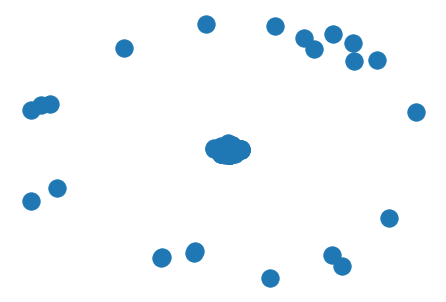

In [71]:
nx.draw(G,pos=nx.spring_layout(G))

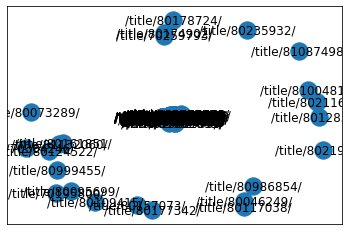

In [72]:
plt.figure()
nx.draw_networkx(G)
plt.show()

## Definition of the graph containing only series

In [24]:
definition_graph(G)

,number_nodes,number_edge,degree min,degree max,degree mean,density graph
0,1463.0,208286.0,0.0,692.0,284.74,0.19


In [25]:
display_titles_movies_degree(G)

,movie
degree min,Astronomy Club: The Sketch Show
degree max,Zoe et Raven


## Centrality for data movies

Compute the **degree centrality** for nodes :

In [26]:
degree_centrality(G)

,title,degree centrality
0,Zoe et Raven,0.4733242134062927
1,Le Club de la deuxième chance,0.46785225718194257
2,Les désastreuses aventures des orphelins Baude...,0.4425444596443228
3,H2O,0.42818057455540354
4,The Moon That Embraces The Sun,0.426812585499316
5,Greenhouse Academy,0.42339261285909713
6,Les Octonautes,0.41997264021887826
7,La colline aux lapins,0.41928864569083446
8,Les nouvelles légendes du Roi Singe,0.4165526675786594
9,Tree With Deep Roots,0.4165526675786594


Compute **closeness centrality** for nodes :

In [27]:
closeness_centrality(G)

,title,closeness centrality
0,Zoe et Raven,0.6479239858670335
1,Le Club de la deuxième chance,0.6420497883523731
2,Les désastreuses aventures des orphelins Baude...,0.6345707137568706
3,The Moon That Embraces The Sun,0.6283770333209118
4,H2O,0.6256015163892823
5,La colline aux lapins,0.625325312629287
6,Les Octonautes,0.625325312629287
7,Tree With Deep Roots,0.6242229321751146
8,Anne with an E,0.6236731981969772
9,Greenhouse Academy,0.6236731981969772


Compute the shortest-path **betweenness centrality** for nodes :

In [90]:
betweenness_centrality(G)

,title,betweenness centrality
0,Si J'étais un Animal,0.01671661616771359
1,You vs. Wild,0.009159761189493791
2,Les anonymes,0.008205645711834233
3,The Undateables,0.008194377376043402
4,Sur le gril : Quand se nourrir est un défi,0.007899240524123793
5,ARASHI's Diary -Voyage-,0.006555974480863505
6,Chasing Monsters,0.006342833876722878
7,Zoe et Raven,0.005788187095639654
8,Les derniers tsars,0.005566826952884035
9,Dave Chappelle: Equanimity & The Bird Revelation,0.0053982031742731695


Compute the **eigenvector centrality** for the graph G :

In [76]:
eigenvector_centrality(G)

,title,eigen vector centrality
0,Le Club de la deuxième chance,0.061200135100119096
1,Zoe et Raven,0.0592736336760424
2,The Moon That Embraces The Sun,0.05764729838920141
3,Greenhouse Academy,0.05735905089111994
4,Tree With Deep Roots,0.05691352810884678
5,H2O,0.05646379870642209
6,Lost & Found : Le studio,0.055777393574455714
7,Backstage,0.05526928249551618
8,A Korean Odyssey,0.05404816472166597
9,The Rise of Phoenixes,0.05394036222034065


# Sources :
- https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html